Estudio del *dataset* de MAMI:

In [1]:
# DATOS: https://competitions.codalab.org/competitions/34175#learn_the_details ***HAY QUE CITARLO APROPIADAMENTE*** #

# Shaming = Label 1
# Stereotype = Label 2
# Objectification = Label 3
# Violence = Label 4

### IMPORTS ###
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
### GOOGLE DRIVE ###
from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/My Drive/TFM/Data/MAMI/"

Mounted at /content/drive


In [3]:
### PARTICIÓN ###
df = pd.read_csv(PATH + "training.csv",  sep=",", on_bad_lines='skip', encoding='utf-8', encoding_errors='ignore', index_col=False)
df = df[['Text Transcription', 'shaming', 'stereotype', 'objectification', 'violence']]
df = df.rename(columns={"Text Transcription": "Text", "shaming": "Label1", "stereotype": "Label2", "objectification": "Label3", "violence": "Label4"})
df.fillna(" ", inplace=True)

X_train = df['Text']
y_train = pd.DataFrame({'Label1':df['Label1'], 'Label2':df['Label2'], 'Label3':df['Label3'], 'Label4':df['Label4']})

X_train, X_aux, y_train, y_aux = train_test_split(X_train, y_train, test_size=0.3, random_state=55)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66, random_state=55)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test))

Tamaño conjunto de Entrenamiento: 5416
Tamaño conjunto de Validación: 789
Tamaño conjunto de Evaluación: 1533


# **ESTUDIO TRAINING**

0    4691
1     725
Name: Label1, dtype: int64


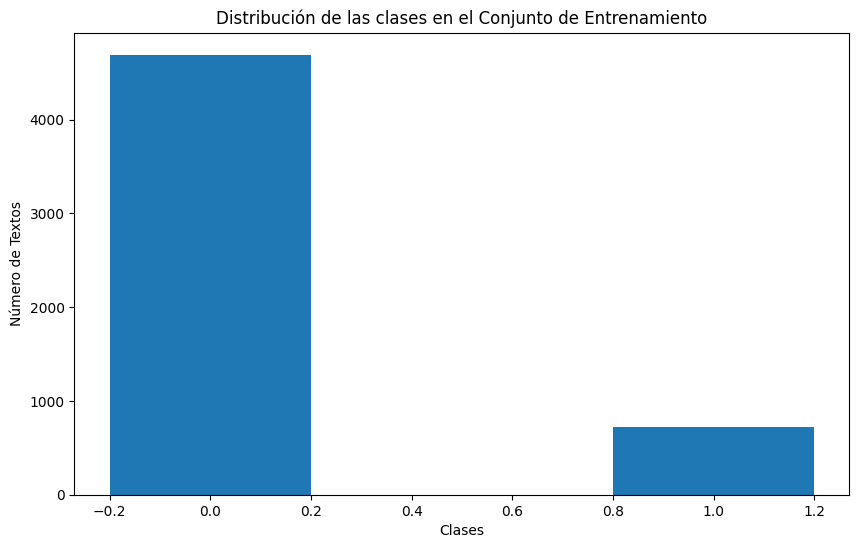

In [4]:
# Análisis de Distribución - Label 1 #
counts = y_train['Label1'].value_counts()
print(counts)

counts_train = y_train['Label1'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

0    3868
1    1548
Name: Label2, dtype: int64


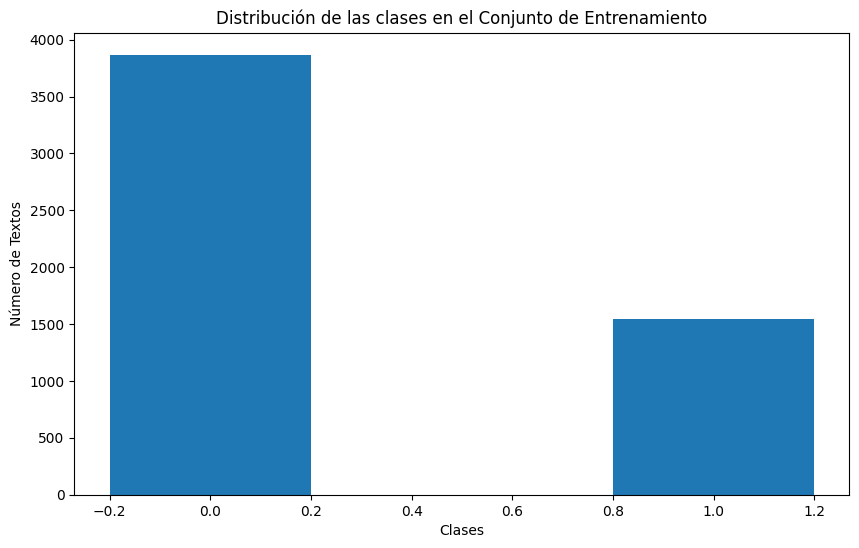

In [5]:
# Análisis de Distribución - Label 2 #
counts = y_train['Label2'].value_counts()
print(counts)

counts_train = y_train['Label2'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

0    4130
1    1286
Name: Label3, dtype: int64


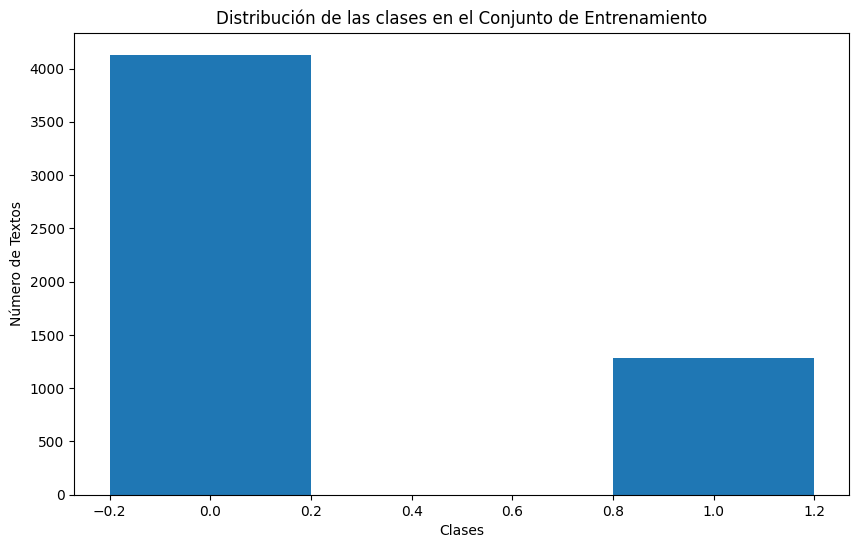

In [6]:
# Análisis de Distribución - Label 3 #
counts = y_train['Label3'].value_counts()
print(counts)

counts_train = y_train['Label3'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

0    4873
1     543
Name: Label4, dtype: int64


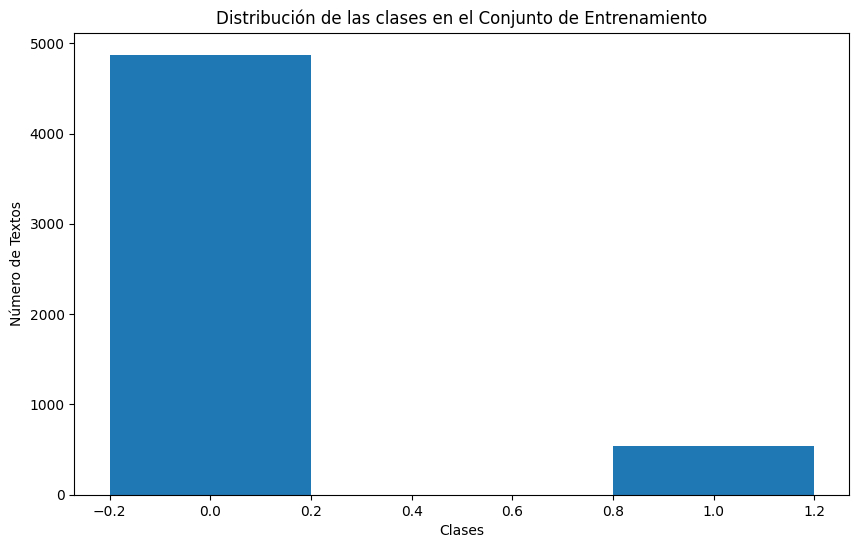

In [7]:
# Análisis de Distribución - Label 4 #
counts = y_train['Label4'].value_counts()
print(counts)

counts_train = y_train['Label4'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

In [8]:
# Análisis de Longitud #
Train_len = X_train.apply(lambda text: len(str(text).split()))
Train_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    5416.000000
mean       15.093612
std         9.442576
min         1.000000
25%         9.000000
50%        13.000000
75%        19.000000
90%        25.000000
95%        31.000000
99%        52.000000
max       122.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

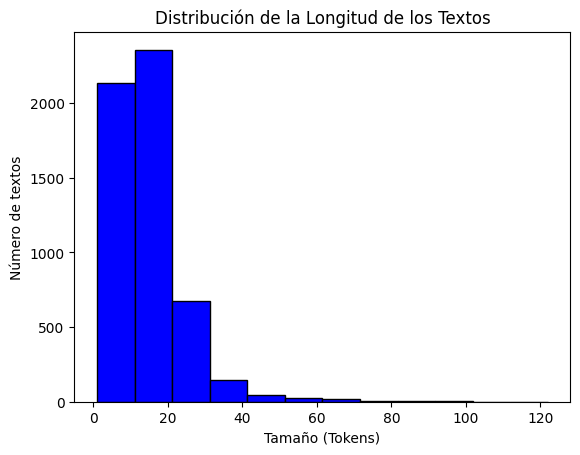

In [9]:
plt.hist(Train_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

# **ESTUDIO VALIDACIÓN**

0    699
1     90
Name: Label1, dtype: int64


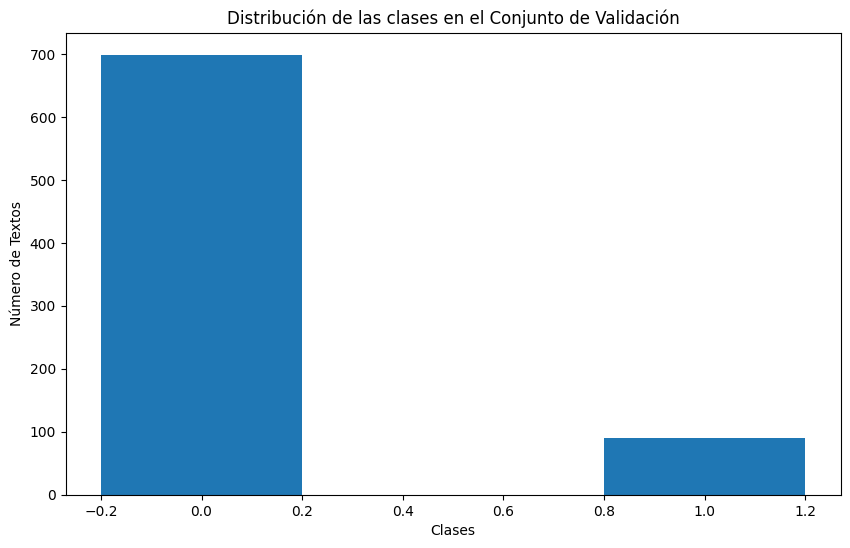

In [10]:
# Análisis de Distribución - Label 1 #
counts = y_val['Label1'].value_counts()
print(counts)

counts_val = y_val['Label1'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

0    567
1    222
Name: Label2, dtype: int64


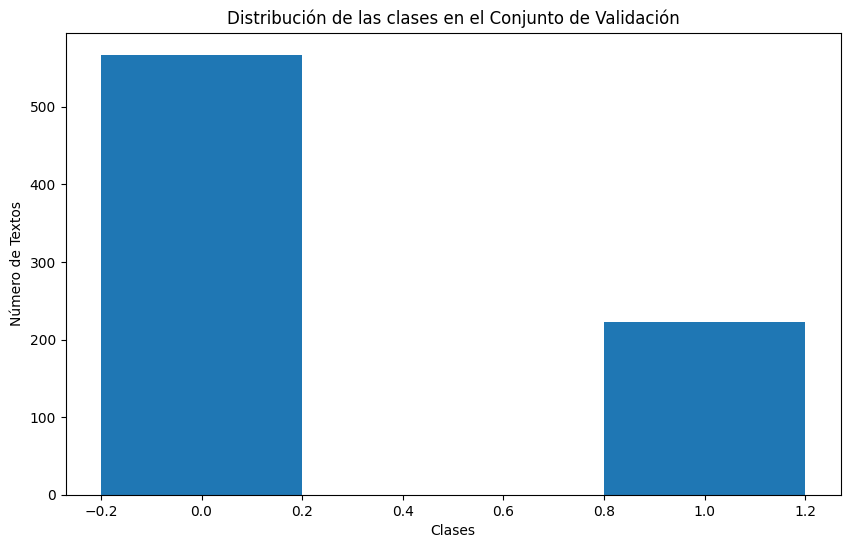

In [11]:
# Análisis de Distribución - Label 2 #
counts = y_val['Label2'].value_counts()
print(counts)

counts_val = y_val['Label2'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

0    615
1    174
Name: Label3, dtype: int64


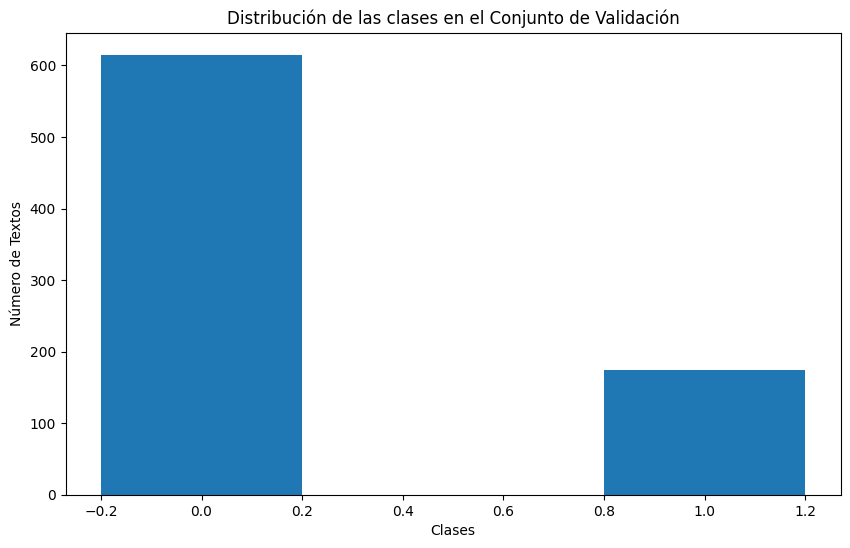

In [12]:
# Análisis de Distribución - Label 3 #
counts = y_val['Label3'].value_counts()
print(counts)

counts_val = y_val['Label3'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

0    712
1     77
Name: Label4, dtype: int64


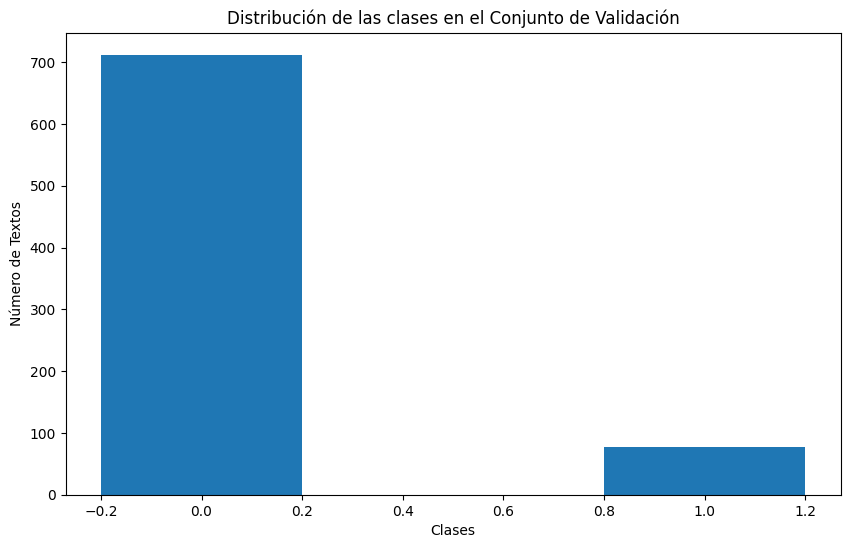

In [13]:
# Análisis de Distribución - Label 4 #
counts = y_val['Label4'].value_counts()
print(counts)

counts_val = y_val['Label4'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

In [14]:
# Análisis de Longitud #
Val_len = X_val.apply(lambda text: len(str(text).split()))
Val_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    789.00000
mean      15.39417
std       11.40378
min        1.00000
25%        9.00000
50%       13.00000
75%       19.00000
90%       25.00000
95%       32.00000
99%       58.12000
max      149.00000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

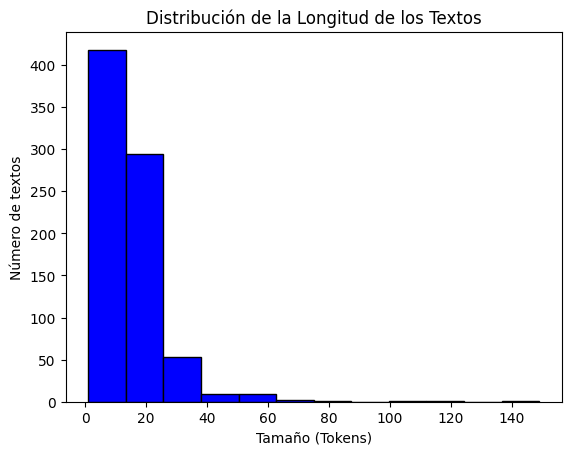

In [15]:
plt.hist(Val_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

# **ESTUDIO TEST**

0    1291
1     242
Name: Label1, dtype: int64


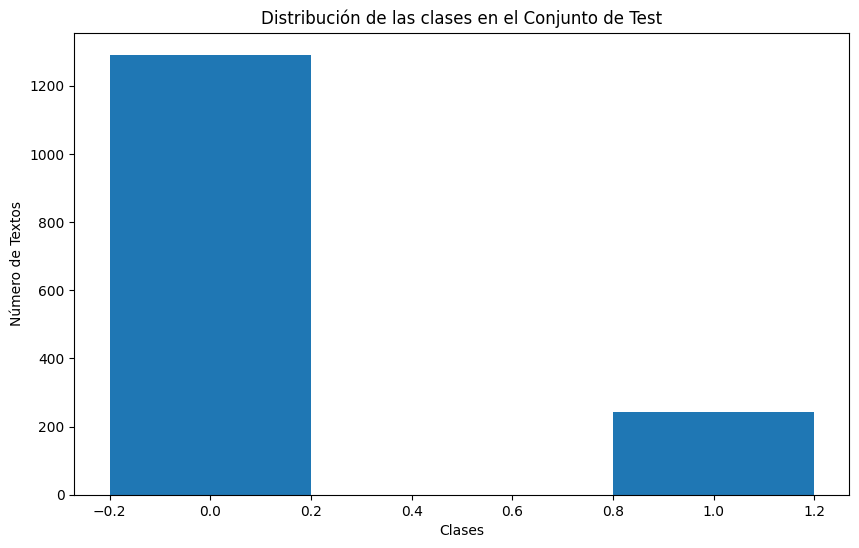

In [16]:
# Análisis de Distribución - Label 1 #
counts = y_test['Label1'].value_counts()
print(counts)

counts_test = y_test['Label1'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

0    1108
1     425
Name: Label2, dtype: int64


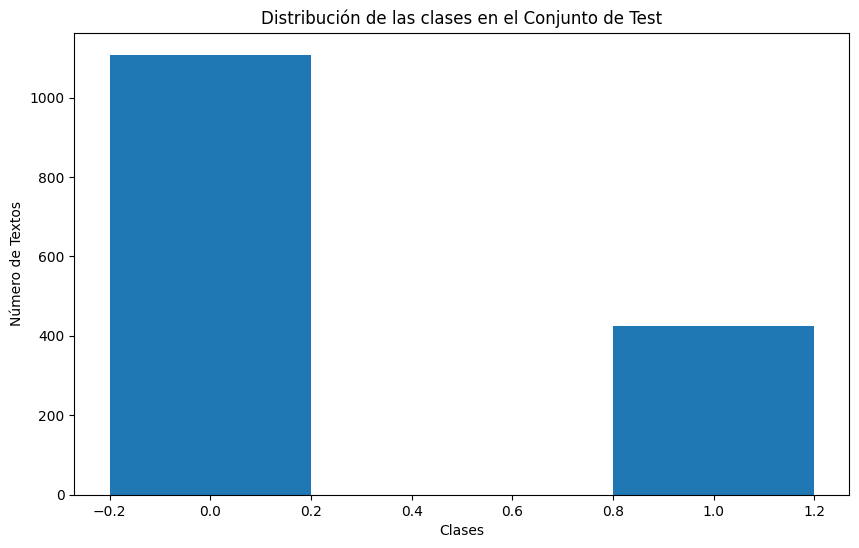

In [17]:
# Análisis de Distribución - Label 2 #
counts = y_test['Label2'].value_counts()
print(counts)

counts_test = y_test['Label2'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

0    1184
1     349
Name: Label3, dtype: int64


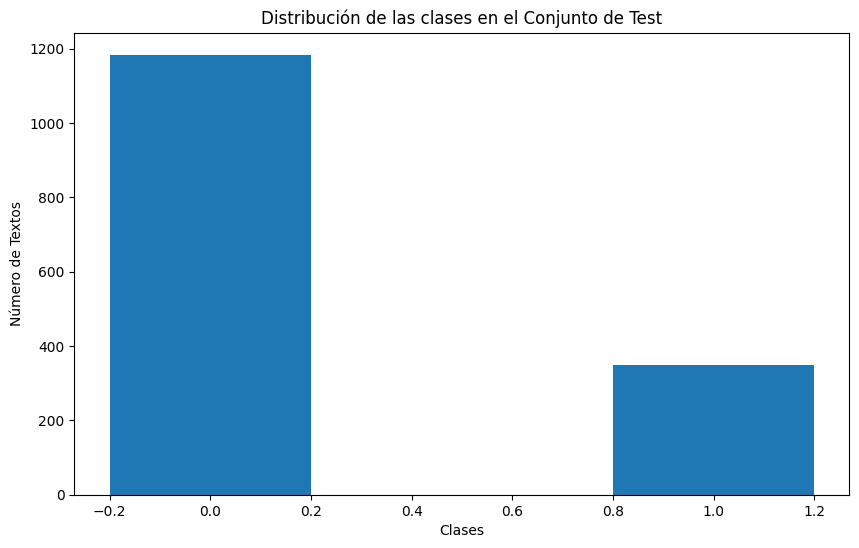

In [18]:
# Análisis de Distribución - Label 3 #
counts = y_test['Label3'].value_counts()
print(counts)

counts_test = y_test['Label3'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

0    1368
1     165
Name: Label4, dtype: int64


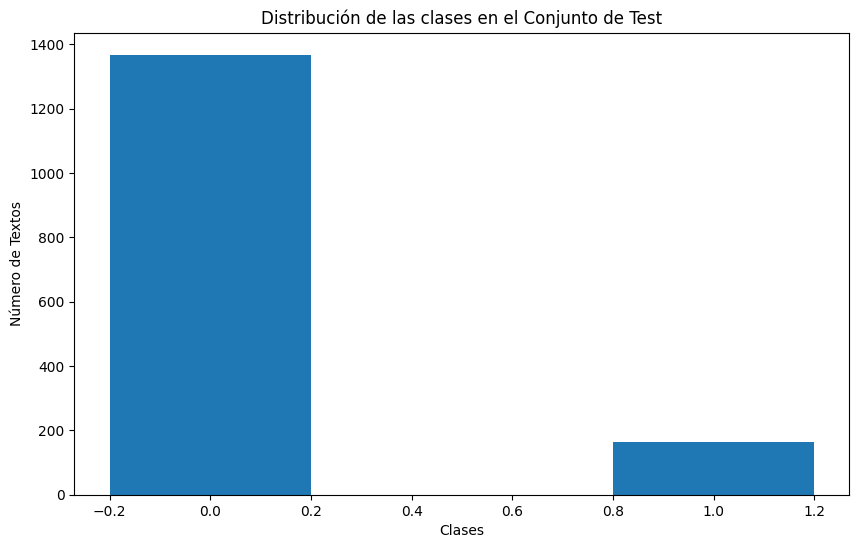

In [19]:
# Análisis de Distribución - Label 4 #
counts = y_test['Label4'].value_counts()
print(counts)

counts_test = y_test['Label4'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

In [20]:
# Análisis de Longitud #
Test_len = X_test.apply(lambda text: len(str(text).split()))
Test_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    1533.000000
mean       15.037182
std        10.470239
min         1.000000
25%         9.000000
50%        13.000000
75%        18.000000
90%        25.000000
95%        30.000000
99%        49.680000
max       151.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

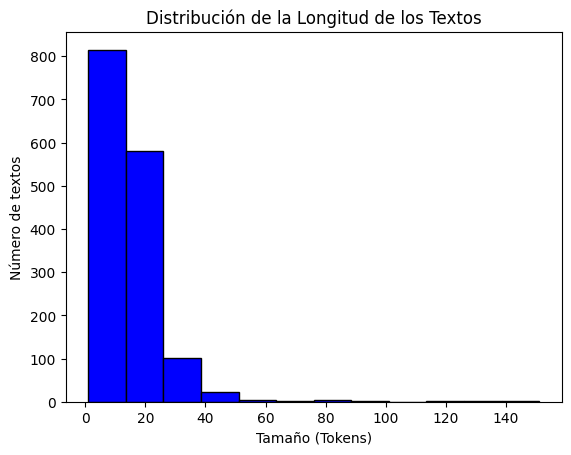

In [21]:
plt.hist(Test_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')